<a href="https://colab.research.google.com/github/jessicasilvacode/imersao-dados-2-alura/blob/main/imersao_dados_2_alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMERSÃO DADOS 2 - ALURA 


Projeto elaborado com base na [2ª edição da Imersão de Dados da Alura](https://cursos.alura.com.br/imersoes/aulas/aula-1-sua-primeira-analise-em-dados-da-educacao-c23), em que foram feitas análises de dados da educação no Brasil com base [nos dados do ENEM](https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv) no ano de 2019.

### Importando biblioteca e dados:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

Dados sobre a educação do Brasil e o ENEM 2019. 

In [2]:
url_dados = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"

dados = pd.read_csv(url_dados)

### Análise exploratória de dados:

Obs.: estamos usando uma amostra selecionada (reduzida) da base da dados do INEP, disponibilizada pela Alura no desafio ["Imersão de Dados 2"](https://cursos.alura.com.br/imersoes/aulas/aula-1-sua-primeira-analise-em-dados-da-educacao-c23). Foi usado um script para pegar os dados de forma aleatória.

In [3]:
dados

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127375,190006120035,2019,3142700,Montalvânia,31,MG,17,F,1,1,...,A,A,A,B,A,A,D,A,B,B
127376,190006120036,2019,2902807,Barra da Estiva,29,BA,18,M,1,2,...,A,A,A,B,A,A,D,A,B,B
127377,190006120037,2019,2927408,Salvador,29,BA,22,F,1,3,...,A,A,A,A,A,A,B,A,A,B
127378,190006120060,2019,2930709,Simões Filho,29,BA,26,F,2,2,...,A,A,A,B,A,A,C,A,A,A


In [4]:
dados.shape

(127380, 136)

Todas as colunas que eu tenho:

In [5]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

Alguns nomes estão confusos, porém o próprio INEP preparou um dicionário com a descrição de cada coluna.

Vamos analisar algumas colunas...

Quantas pessoas fizeram o ENEM por estado:

In [6]:
dados['SG_UF_RESIDENCIA'].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

In [7]:
dados['SG_UF_RESIDENCIA'].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [8]:
len(dados['SG_UF_RESIDENCIA'].value_counts())

27

### Analisando as idades das pessoas que realizaram o ENEM:

In [9]:
dados['NU_IDADE'].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
73        2
75        2
77        1
82        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

Pessoas com 18 anos é maioria.

In [10]:
idades = dados['NU_IDADE'].value_counts().to_frame().reset_index()
idades.columns = ['idade', 'quantidade_de_pessoas']
idades

,idade,quantidade_de_pessoas
0,18,21452
1,17,21256
2,19,14418
3,20,10413
4,16,7830
...,...,...
60,73,2
61,75,2
62,77,1
63,82,1


In [11]:
idades.query('idade >= 18').sort_index()

,idade,quantidade_de_pessoas
0,18,21452
2,19,14418
3,20,10413
5,21,7267
6,22,5924
7,23,4668
8,24,3838
9,25,3128
10,26,2717
11,27,2214


Quantas pessoas com menos de 18 anos fizeram o ENEM:


In [12]:
menor_idade = idades.query('idade < 18').sort_index()
menor_idade

,idade,quantidade_de_pessoas
1,17,21256
4,16,7830
12,15,2009
40,14,141
58,13,4


In [13]:
menor_idade['quantidade_de_pessoas'].sum()

31240

Quantas pessoas maior de idade fizeram o ENEM:

In [14]:
maior_idade = idades.query('idade >= 18').sort_index()
maior_idade

,idade,quantidade_de_pessoas
0,18,21452
2,19,14418
3,20,10413
5,21,7267
6,22,5924
7,23,4668
8,24,3838
9,25,3128
10,26,2717
11,27,2214


In [15]:
maior_idade['quantidade_de_pessoas'].sum()

96140

Idade mínima e máxima das pessoas que realizaram o ENEM de 2019:

In [16]:
dados['NU_IDADE'].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

13 anos foi a idade mínima e 82 anos a idade máxima.

<Axes: >

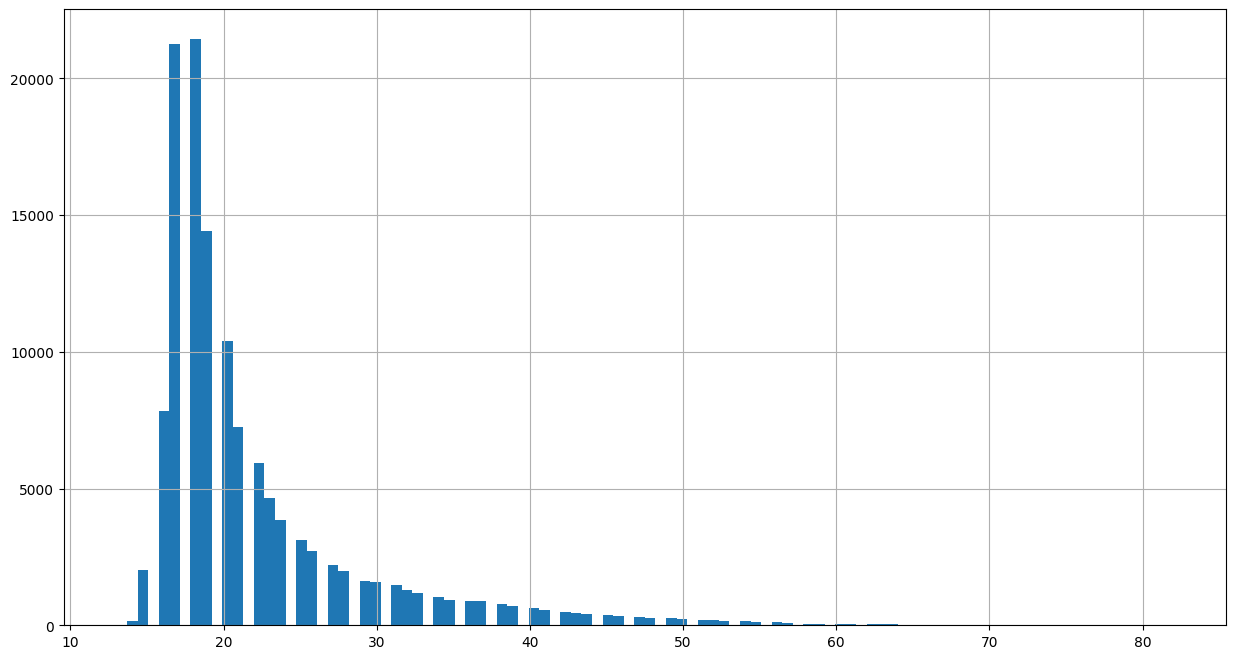

In [17]:
dados['NU_IDADE'].hist(bins = 100, figsize = (15, 8))

**Proporção da idade** das pessoas que fizeram o ENEM:

In [18]:
dados['NU_IDADE'].value_counts(normalize = True)

18    0.168409
17    0.166871
19    0.113189
20    0.081748
16    0.061470
        ...   
73    0.000016
75    0.000016
77    0.000008
82    0.000008
76    0.000008
Name: NU_IDADE, Length: 65, dtype: float64

Percebemos que as pessoas que possuem entre 16 a 20 anos estão entre a maioria.

**Quais estados são os inscritos com 13 anos?**

In [19]:
dados.query('NU_IDADE == 13')

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
57359,190003297248,2019,3504107,Atibaia,35,SP,13,F,1,1,...,B,A,A,B,A,A,D,B,B,B
95630,190004825557,2019,5107602,Rondonópolis,51,MT,13,M,1,1,...,A,A,A,B,B,A,B,A,A,B
98197,190004926952,2019,1600303,Macapá,16,AP,13,M,1,3,...,B,A,A,C,B,A,E,A,B,B
116501,190005659236,2019,2917508,Jacobina,29,BA,13,M,1,3,...,B,A,A,D,A,B,C,B,C,B


In [20]:
dados.query('NU_IDADE == 13')['SG_UF_RESIDENCIA'].value_counts()

SP    1
MT    1
AP    1
BA    1
Name: SG_UF_RESIDENCIA, dtype: int64

**Proporção dos estados** das pessoas que fizeram o ENEM:

In [21]:
dados['SG_UF_RESIDENCIA'].value_counts(normalize = True)

SP    0.159083
MG    0.106351
BA    0.078819
RJ    0.066470
CE    0.057945
PA    0.056288
PE    0.054491
MA    0.043515
RS    0.042911
PR    0.041286
GO    0.033506
PB    0.028968
PI    0.023818
RN    0.023230
AM    0.022138
SC    0.020984
ES    0.020019
DF    0.018904
AL    0.017766
MT    0.017507
SE    0.014249
MS    0.012993
RO    0.010991
TO    0.009248
AP    0.008220
AC    0.007427
RR    0.002873
Name: SG_UF_RESIDENCIA, dtype: float64

### Analisando os dados de quem faz o ENEM para treinar: *****

Analisando os dados de quem é "treineiro", ou seja, está fazendo o ENEM somente para treinar, sem o objetivo de usar como nota para ingressar na universidade.

In [22]:
dados.IN_TREINEIRO

0         1
1         0
2         0
3         0
4         1
         ..
127375    0
127376    0
127377    0
127378    0
127379    0
Name: IN_TREINEIRO, Length: 127380, dtype: int64

1 = True |
0 = False

In [23]:
dados.query('IN_TREINEIRO == 1')

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B
12,190001005076,2019,1506138,Redenção,15,PA,15,M,1,3,...,B,A,A,B,B,A,C,A,A,B
14,190001005081,2019,1506807,Santarém,15,PA,17,F,1,3,...,A,A,A,B,A,A,D,A,A,B
16,190001005202,2019,1502301,Capitão Poço,15,PA,17,F,1,3,...,B,A,A,B,B,A,C,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127328,190006117441,2019,3126752,Franciscópolis,31,MG,16,M,3,3,...,A,A,A,B,A,A,D,A,A,B
127340,190006117776,2019,4305108,Caxias do Sul,43,RS,17,F,1,1,...,B,A,B,A,A,A,C,A,C,B
127349,190006118483,2019,2511301,Piancó,25,PB,15,F,1,1,...,A,A,A,B,A,A,B,A,A,A
127350,190006118551,2019,2611606,Recife,26,PE,16,M,1,1,...,B,A,B,E,B,B,E,B,B,B


In [24]:
dados.query('IN_TREINEIRO == 1')['IN_TREINEIRO']

0         1
4         1
12        1
14        1
16        1
         ..
127328    1
127340    1
127349    1
127350    1
127352    1
Name: IN_TREINEIRO, Length: 15401, dtype: int64

In [25]:
dados.query('IN_TREINEIRO == 1')['IN_TREINEIRO'].value_counts()

1    15401
Name: IN_TREINEIRO, dtype: int64

In [26]:
dados.query('IN_TREINEIRO == 1')['NU_IDADE'].value_counts().sort_index()

14      64
15    1927
16    7142
17    4901
18     858
19     228
20      83
21      44
22      30
23      21
24      13
25       8
26      13
27       9
28       6
29      10
30       4
31       4
32       2
33       1
34       3
35       2
36       2
37       1
38       4
39       2
40       4
41       1
42       4
44       2
45       1
46       2
47       1
48       1
51       1
55       1
62       1
Name: NU_IDADE, dtype: int64

Ou seja, as pessoas que mais fazem o ENEM para treinar tem 16 anos.

**Desafio 04: plotar histogramas das idades dos treineiros e não treineiros.**

In [27]:
treineiros = dados.query('IN_TREINEIRO == 1')['NU_IDADE'].value_counts().to_frame().reset_index()
treineiros.columns = ['idade', 'quantidade_de_pessoas']
treineiros

,idade,quantidade_de_pessoas
0,16,7142
1,17,4901
2,15,1927
3,18,858
4,19,228
5,20,83
6,14,64
7,21,44
8,22,30
9,23,21


In [28]:
nao_treineiros = dados.query('IN_TREINEIRO == 0')['NU_IDADE'].value_counts().to_frame().reset_index()
nao_treineiros.columns = ['idade', 'quantidade_de_pessoas']
nao_treineiros

,idade,quantidade_de_pessoas
0,18,20594
1,17,16355
2,19,14190
3,20,10330
4,21,7223
...,...,...
60,73,2
61,75,2
62,77,1
63,82,1


<Axes: xlabel='idade'>

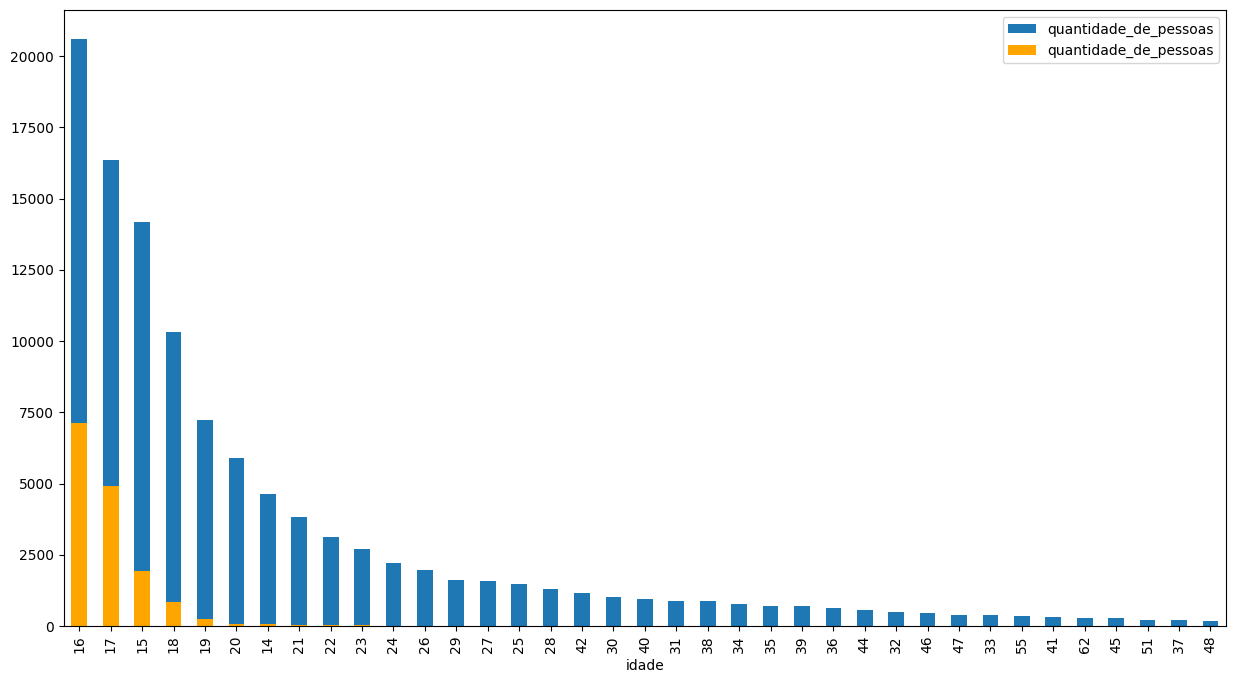

In [29]:
fig, ax = plt.subplots()
nao_treineiros.plot.bar(x = 'idade', y = 'quantidade_de_pessoas', figsize = (15, 8), ax=ax)
treineiros.plot.bar(x = 'idade', y = 'quantidade_de_pessoas', figsize = (15, 8), color = 'orange', ax=ax)

### Analisando as notas das provas:

In [30]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


Analisando as notas da prova de redação:



<Axes: >

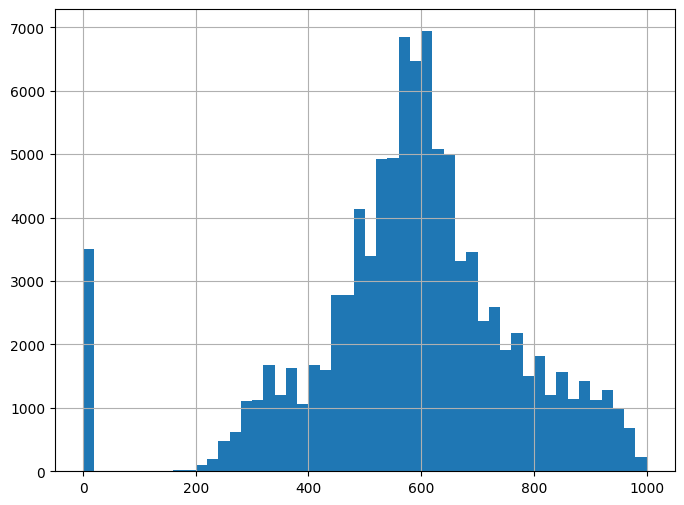

In [31]:
dados['NU_NOTA_REDACAO'].hist(bins = 50, figsize = (8,6))

<Axes: >

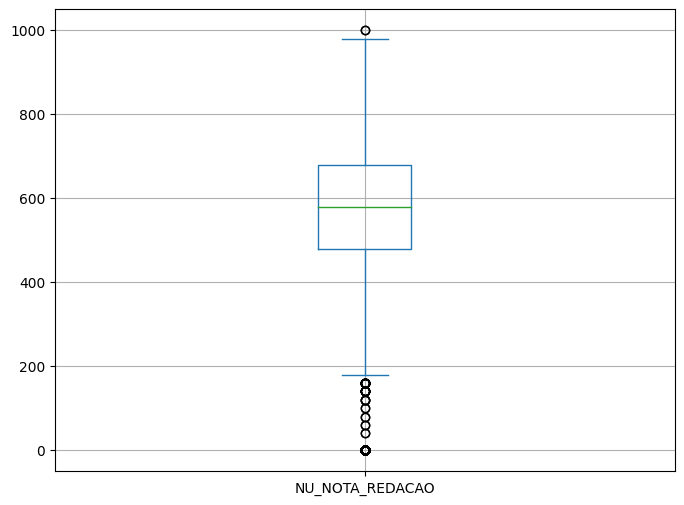

In [32]:
dados['NU_NOTA_REDACAO'].plot.box(grid = True, figsize = (8,6))

Como analisar o gráfico boxplot: o quadrado representa a concentração de dados, nesse caso, a maioria das pessoas/maioria das notas. A linha verde representa a mediana, ou seja, 50% das pessoas está com a nota abaixo desse valor e 50% está com a nota acima desse valor. Também são mostrados os quartis 25% e 75%. As bolinhas representam eventos isolados, pequenos pontos dispersos da concentração. 

Vamos analisar os boxplots de todas as notas:

<Axes: >

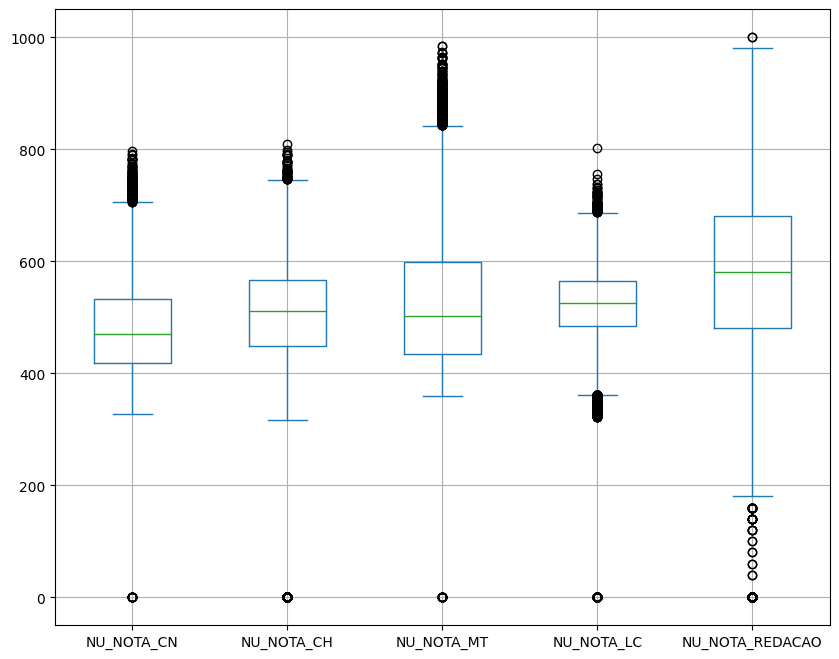

In [33]:
dados[provas].plot.box(grid = True, figsize = (10,8))

array([[<Axes: title={'center': 'NU_NOTA_CN'}>,
        <Axes: title={'center': 'NU_NOTA_CH'}>],
       [<Axes: title={'center': 'NU_NOTA_MT'}>,
        <Axes: title={'center': 'NU_NOTA_LC'}>],
       [<Axes: title={'center': 'NU_NOTA_REDACAO'}>, <Axes: >]],
      dtype=object)

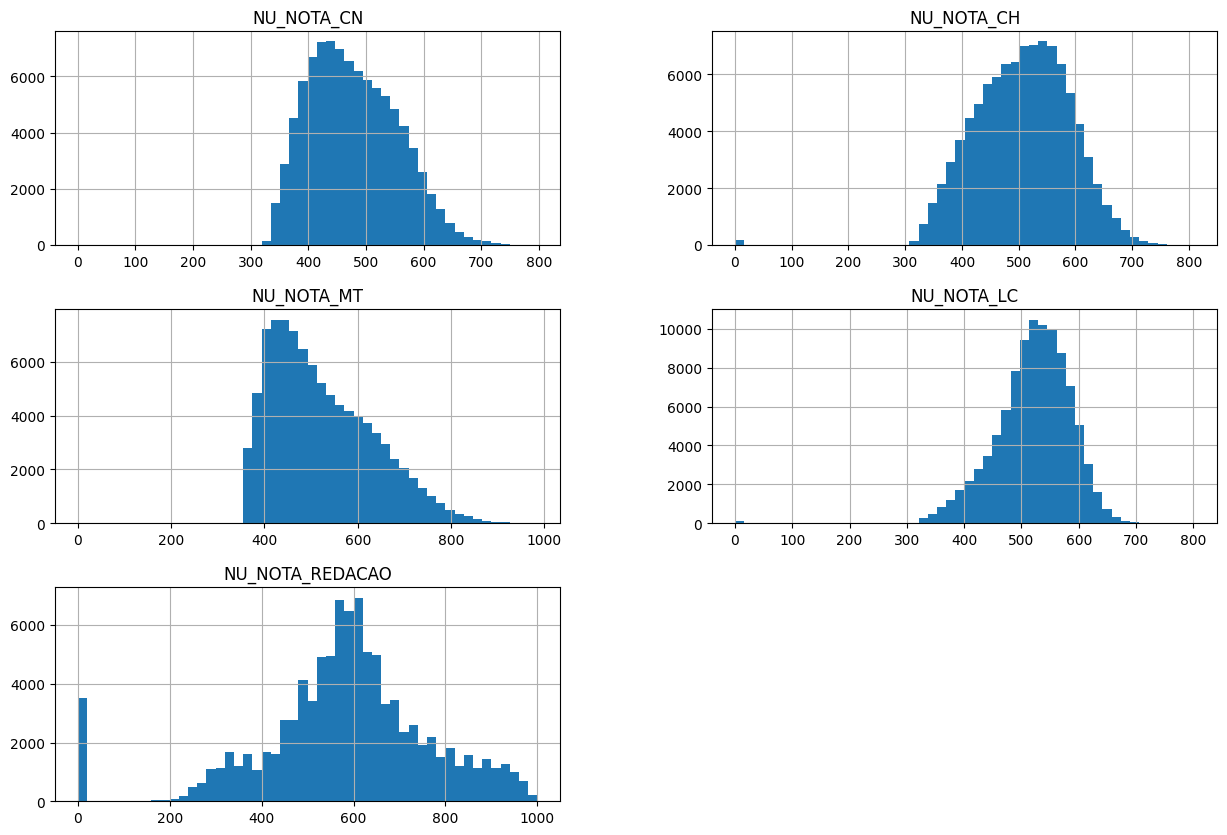

In [34]:
dados[provas].hist(bins = 50, figsize = (15,10))

### Analisando a renda familiar: *****

Varia de **'A'** a **'Q'**, sendo que quanto mais próximo do 'Q', maior a renda, e quanto mais próximo do 'A', menor a renda familiar.

In [35]:
dados['Q006'].value_counts().sort_index()

A     5840
B    31790
C    32594
D    12555
E    11863
F     5640
G     7527
H     4816
I     3552
J     2099
K     1482
L     1104
M     1090
N     1533
O     1327
P     1132
Q     1436
Name: Q006, dtype: int64

Analisando as notas de redação por renda familiar...

In [36]:
renda_ordenada = dados['Q006'].unique()
renda_ordenada.sort()
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

<Axes: xlabel='Q006', ylabel='NU_NOTA_REDACAO'>

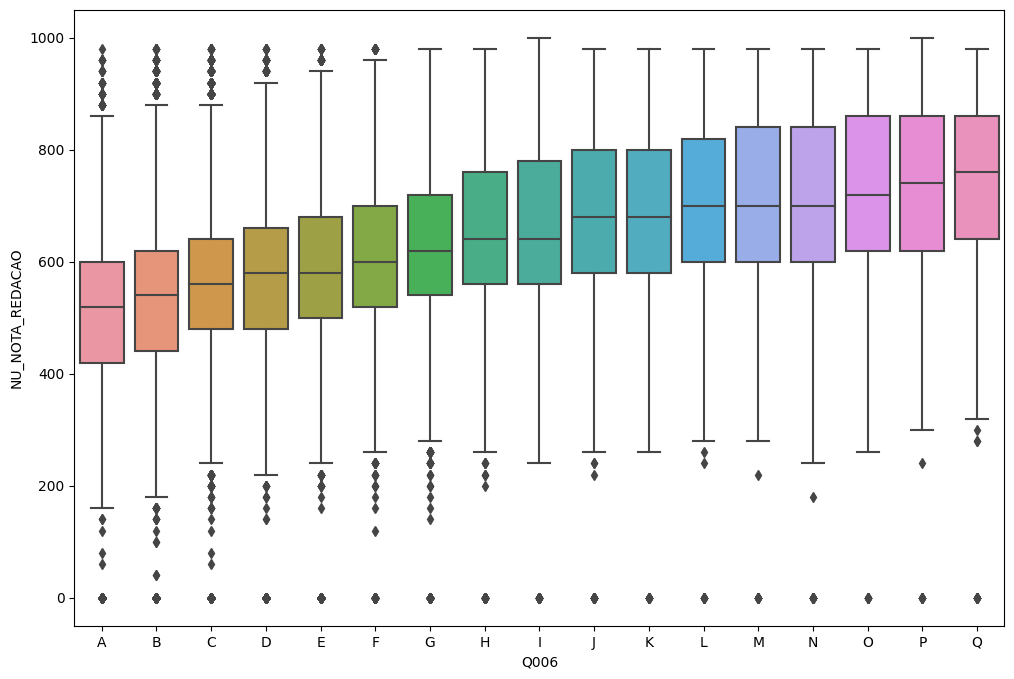

In [37]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Q006', y = 'NU_NOTA_REDACAO', data = dados, order = renda_ordenada)

Percebemos que quanto maior a renda familiar, maiores as notas. E percebemos também que quanto maior a renda, menor os outliners (pontos de dispersão).


Vamos observar esse mesmo gráfico, porém com a nota total de todas as disciplinas do ENEM.

Primeiro, preciso somar todas as notas pra cada um dos inscritos.


In [38]:
provas

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

In [39]:
dados['NU_NOTA_TOTAL'] = dados[provas].sum(axis=1)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


Temos então uma coluna chamada "NU_NOTA_TOTAL" com a soma de todas as notas, por indivíduo inscrito. 

<Axes: xlabel='Q006', ylabel='NU_NOTA_TOTAL'>

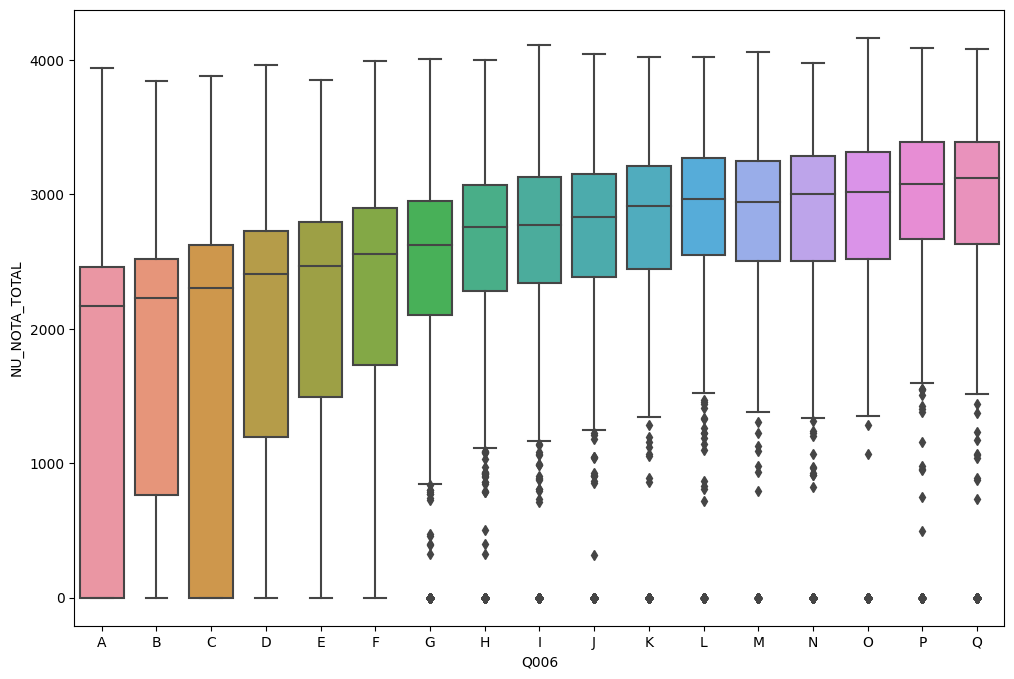

In [40]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Q006', y = 'NU_NOTA_TOTAL', data = dados, order = renda_ordenada)

O gráfico mostra sim uma correlação entre notas e renda familiar, porém o que fez as pessoas tirarem tanta nota zero? 

Conforme vamos aumentando a renda, ainda existem notas baixas, mas são menos comuns. 

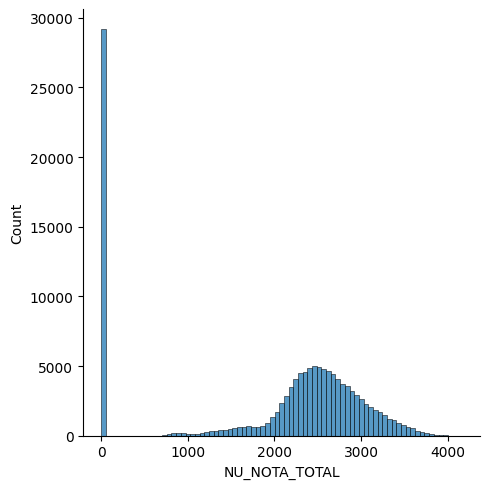

In [41]:
sns.displot(dados, x = 'NU_NOTA_TOTAL')

O que levou as pessoas a tirarem tanta nota zero? 

Vamos adicionar a coluna 'NU_NOTA_TOTAL' as nossas notas das provas.

In [42]:
provas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
provas.append('NU_NOTA_TOTAL')
dados[provas].query('NU_NOTA_TOTAL == 0')

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
10,NaN,NaN,NaN,NaN,NaN,0.0
11,NaN,NaN,NaN,NaN,NaN,0.0
26,NaN,NaN,NaN,NaN,NaN,0.0
38,NaN,NaN,NaN,NaN,NaN,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
127351,NaN,NaN,NaN,NaN,NaN,0.0
127365,NaN,NaN,NaN,NaN,NaN,0.0
127366,NaN,NaN,NaN,NaN,NaN,0.0
127368,NaN,NaN,NaN,NaN,NaN,0.0


Ou seja, as notas zero também são atribuídas as pessoas que não compareceram as provas. 


Podemos observar a grande quantidade de pessoas de renda mais baixa que não tiveram presença na prova do ENEM.

Isso poderia ser devido ao **deslocamento para a realização da prova**? As pessoas com renda familiar mais baixa utilizam mais o **transporte coletivo** e estão mais suscetíveis a fatores externos.

**Desafio: analisar as perguntas "Q010 - Na residência tem carro?" e "Q011 - Na residência tem moto?" com relação as notas das provas.**

### Limpeza de dados: retirando as notas '0' e/ou os "não compareceram". *****

Para uma melhor análise dos dados, vamos retirar as pessoas que não estiveram presente, ou não realizaram as provas ou foram eliminados. Vamos somente considerar as pessoas que realizaram pelo menos 1 da 5 provas, ou que estiveram presentes em pelo menos 1 dia. 

In [43]:
dados_sem_nota_zero = dados[provas].query('NU_NOTA_TOTAL != 0')
dados_sem_nota_zero

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
0,435.6,512.3,432.4,488.6,420.0,2288.9
1,NaN,409.3,NaN,375.3,400.0,1184.6
2,423.2,499.1,427.2,441.0,560.0,2350.5
3,426.2,578.1,499.9,551.5,500.0,2555.7
4,516.5,571.3,424.5,511.2,780.0,2803.5
...,...,...,...,...,...,...
127375,502.4,559.6,539.7,525.7,740.0,2867.4
127376,449.1,380.9,418.2,450.3,520.0,2218.5
127377,NaN,516.0,NaN,497.9,440.0,1453.9
127378,564.7,416.2,455.7,517.3,620.0,2573.9


In [44]:
dados_sem_nota_zero = dados.query('NU_NOTA_TOTAL != 0')
dados_sem_nota_zero

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127375,190006120035,2019,3142700,Montalvânia,31,MG,17,F,1,1,...,A,A,B,A,A,D,A,B,B,2867.4
127376,190006120036,2019,2902807,Barra da Estiva,29,BA,18,M,1,2,...,A,A,B,A,A,D,A,B,B,2218.5
127377,190006120037,2019,2927408,Salvador,29,BA,22,F,1,3,...,A,A,A,A,A,B,A,A,B,1453.9
127378,190006120060,2019,2930709,Simões Filho,29,BA,26,F,2,2,...,A,A,B,A,A,C,A,A,A,2573.9


<Axes: xlabel='Q006', ylabel='NU_NOTA_TOTAL'>

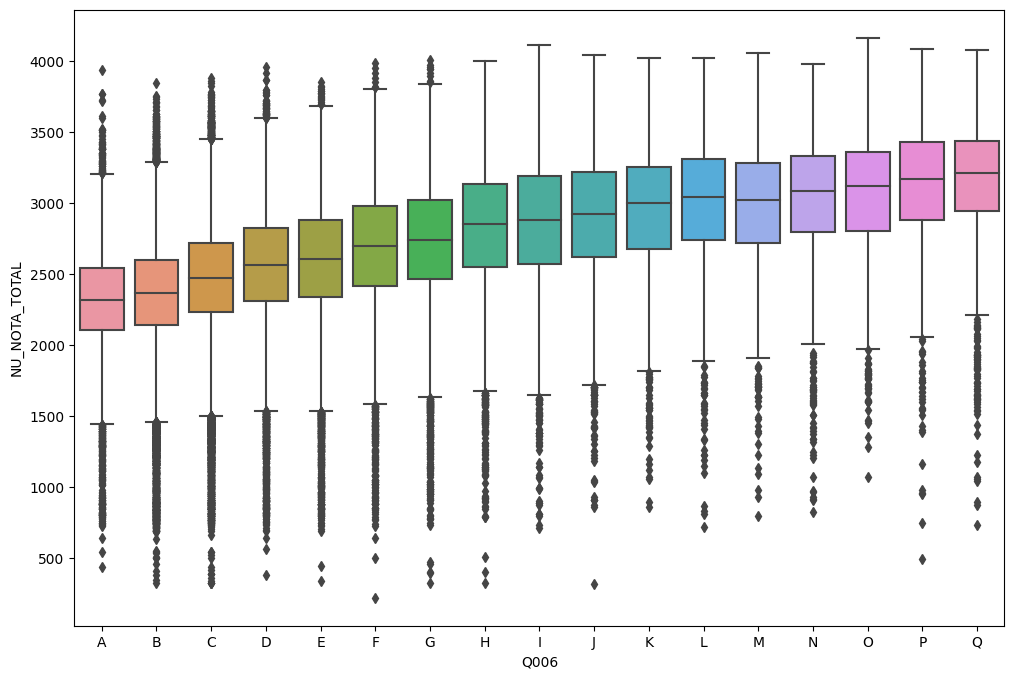

In [45]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'Q006', y = 'NU_NOTA_TOTAL', data = dados_sem_nota_zero, order = renda_ordenada)

Agora vamos analisar essas notas considerando se a pessoa fez a prova do ENEM para treinar ou não.

<Axes: xlabel='Q006', ylabel='NU_NOTA_TOTAL'>

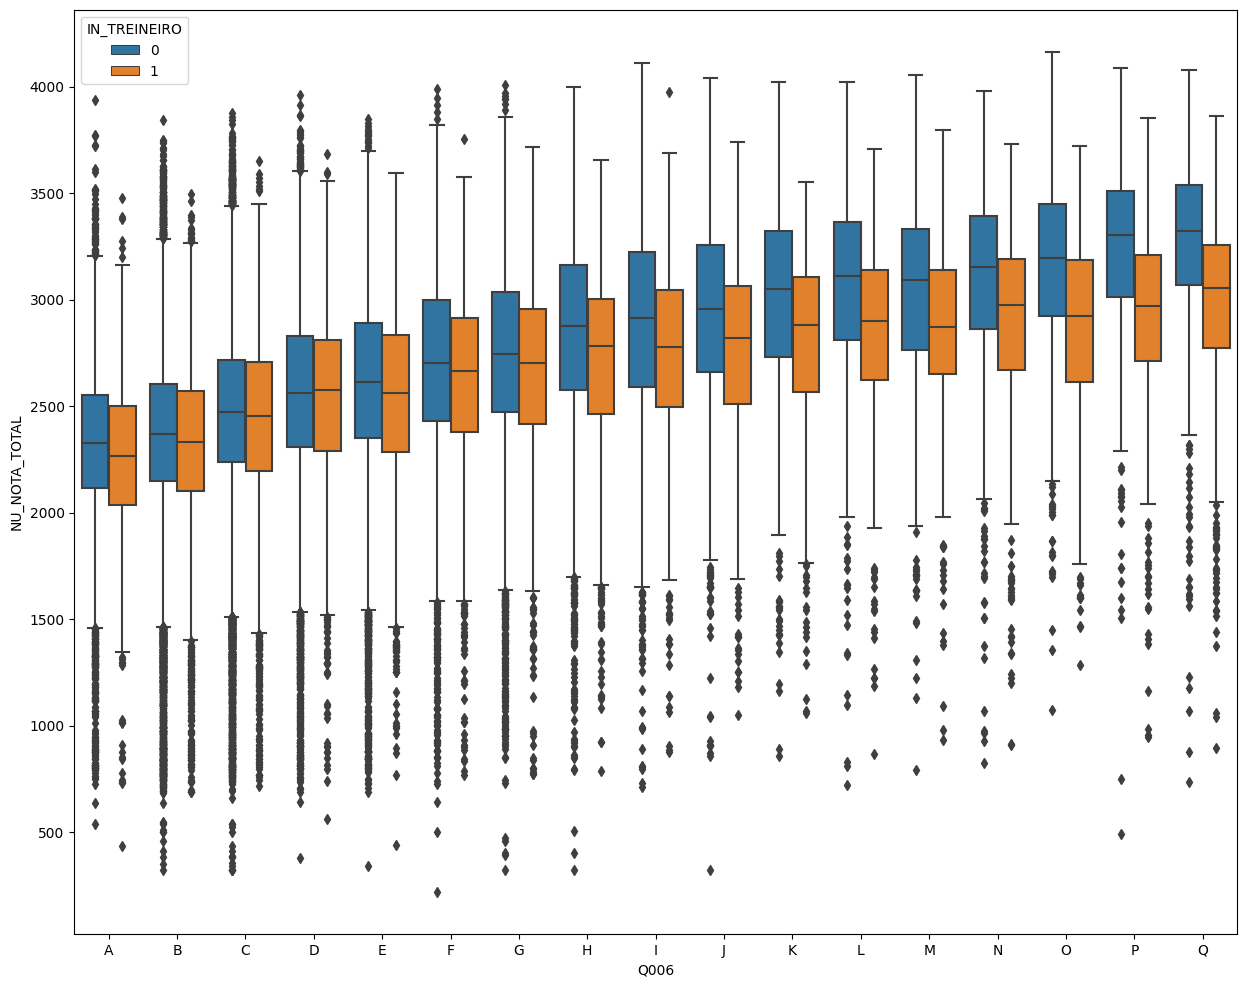

In [46]:
plt.figure(figsize = (15,12))
sns.boxplot(x = 'Q006', y = 'NU_NOTA_TOTAL', data = dados_sem_nota_zero, 
            hue = 'IN_TREINEIRO', order = renda_ordenada)

0 = NÃO TREINEIRO | 1 = TREINEIRO

Histograma das notas totais, sem as notas '0':

<Axes: xlabel='NU_NOTA_TOTAL', ylabel='Count'>

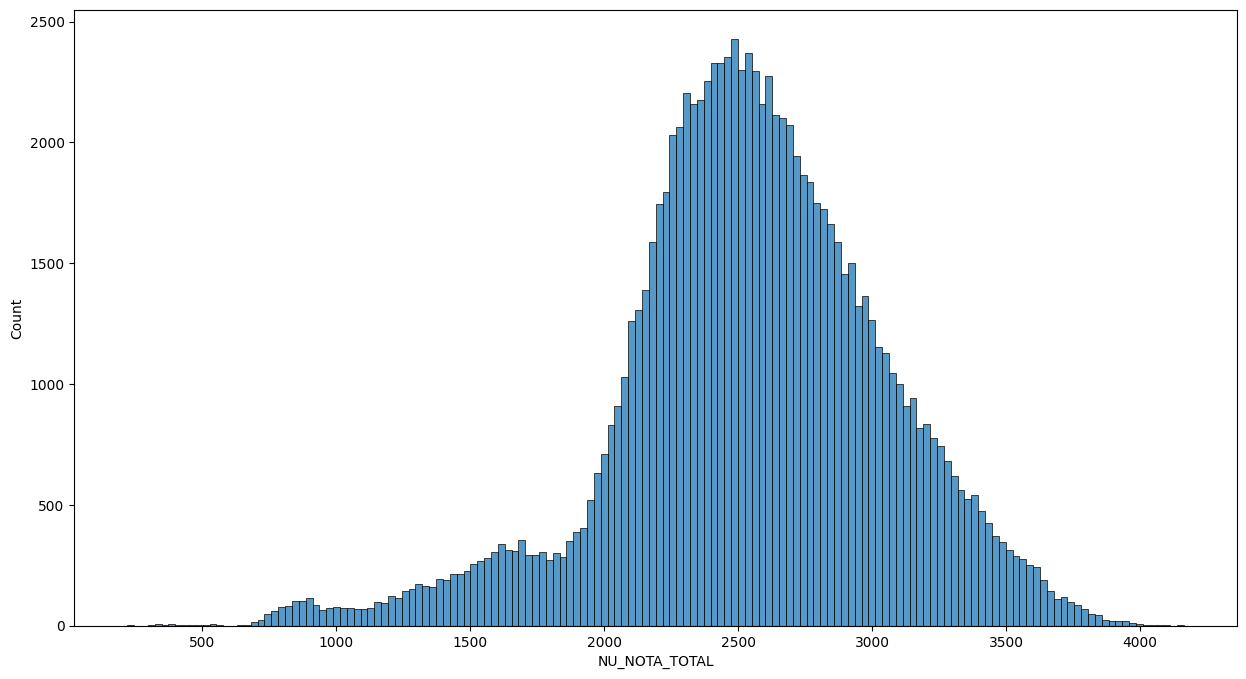

In [47]:
plt.figure(figsize = (15, 8))
sns.histplot(dados_sem_nota_zero, x = 'NU_NOTA_TOTAL')

**Desafio: verificar a proporção dos participantes de renda mais baixa ou mais alta como treineiro ou não treineiro.**

### Analisando notas vs. internet em casa: *****

<Axes: xlabel='NU_NOTA_TOTAL', ylabel='Count'>

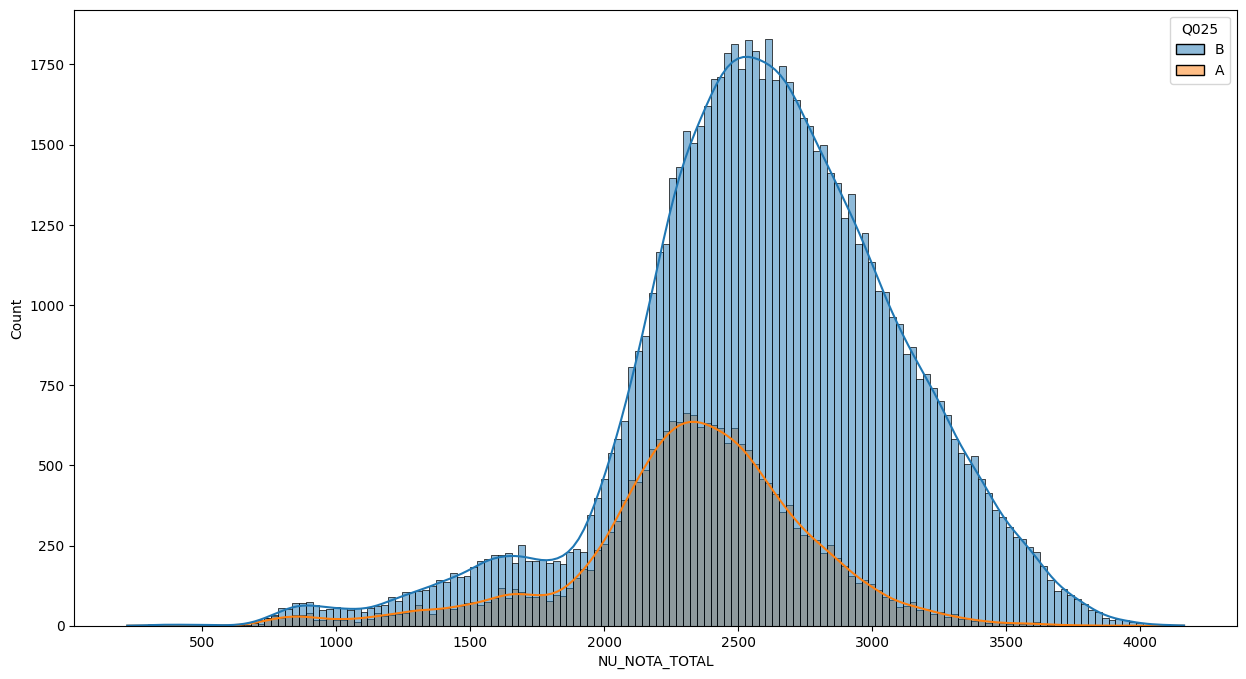

In [48]:
plt.figure(figsize = (15, 8))
sns.histplot(dados_sem_nota_zero, x = 'NU_NOTA_TOTAL', hue = 'Q025', kde = True)

Sendo 'B' as pessoas que tem internet, e 'A' as pessoas que não tem internet em casa, podemos ver que tem mais pessoas com internet em casa, e que a média das notas dessas pessoas é relativamente mais alta.

Analisando estatisticamente esse gráfico...

Agora vamos normalizar pela área total do histograma.

<Axes: xlabel='NU_NOTA_TOTAL', ylabel='Probability'>

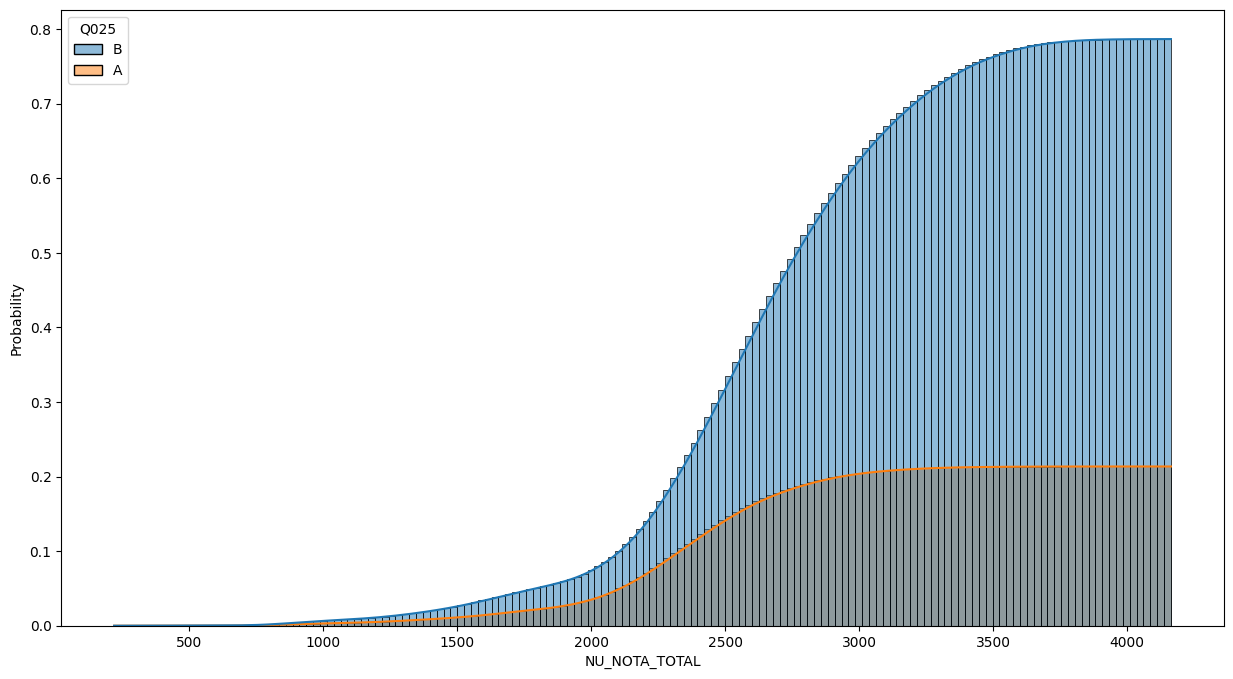

In [49]:
plt.figure(figsize = (15, 8))
sns.histplot(dados_sem_nota_zero, x = 'NU_NOTA_TOTAL', hue = 'Q025', kde = True, stat = 'probability', cumulative = True)

Usando a *stat = 'probability'* e a *'cumulative = True'* logo abaixo, o gráfico vai comparar o topo, ou seja, 20% de todas as pessoas não possuem acesso à internet, e desses 20%, elas se acumulam, e podemos observar que quase ninguém tira nota acima de 3300 mais ou menos.

Vamos analisar agora a relação de uma nota com a outra: **redação e matemática**, por exemplo, com relação ao acesso à internet.

<Axes: xlabel='NU_NOTA_REDACAO', ylabel='NU_NOTA_MT'>

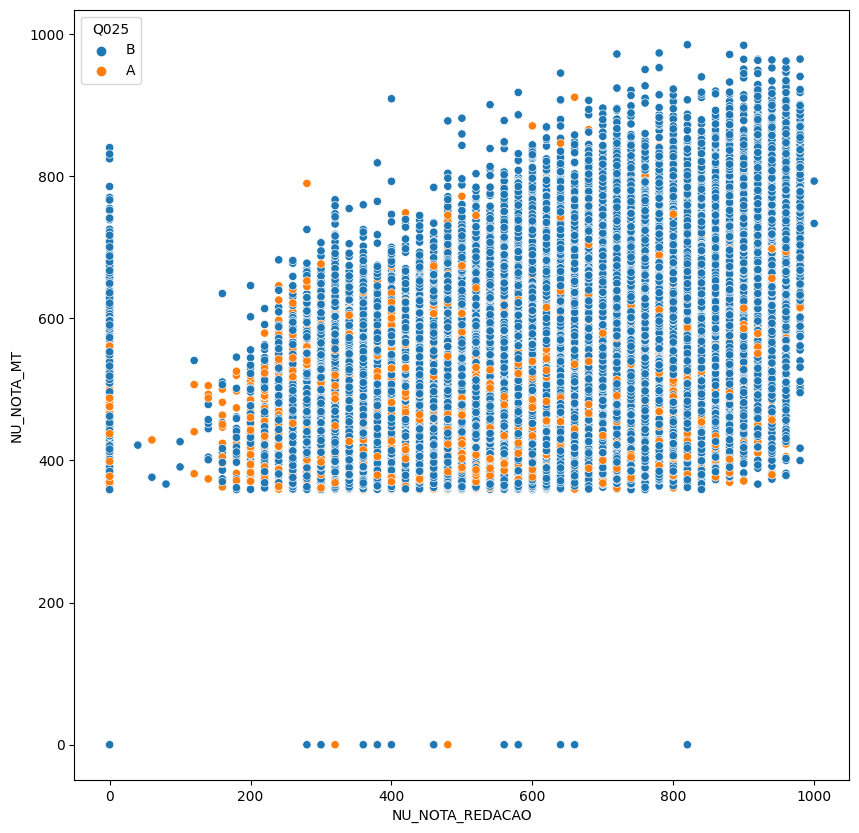

In [50]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data = dados_sem_nota_zero, x = 'NU_NOTA_REDACAO', y = 'NU_NOTA_MT', hue = 'Q025')

Sendo 'A' quem não tem acesso a internet, e 'B' quem tem acesso a internet em casa.

Olhando essa relação com todas as notas, temos:

In [51]:
dados_sem_nota_zero[provas]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
0,435.6,512.3,432.4,488.6,420.0,2288.9
1,NaN,409.3,NaN,375.3,400.0,1184.6
2,423.2,499.1,427.2,441.0,560.0,2350.5
3,426.2,578.1,499.9,551.5,500.0,2555.7
4,516.5,571.3,424.5,511.2,780.0,2803.5
...,...,...,...,...,...,...
127375,502.4,559.6,539.7,525.7,740.0,2867.4
127376,449.1,380.9,418.2,450.3,520.0,2218.5
127377,NaN,516.0,NaN,497.9,440.0,1453.9
127378,564.7,416.2,455.7,517.3,620.0,2573.9


In [52]:
provas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_MT',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'NU_NOTA_TOTAL']

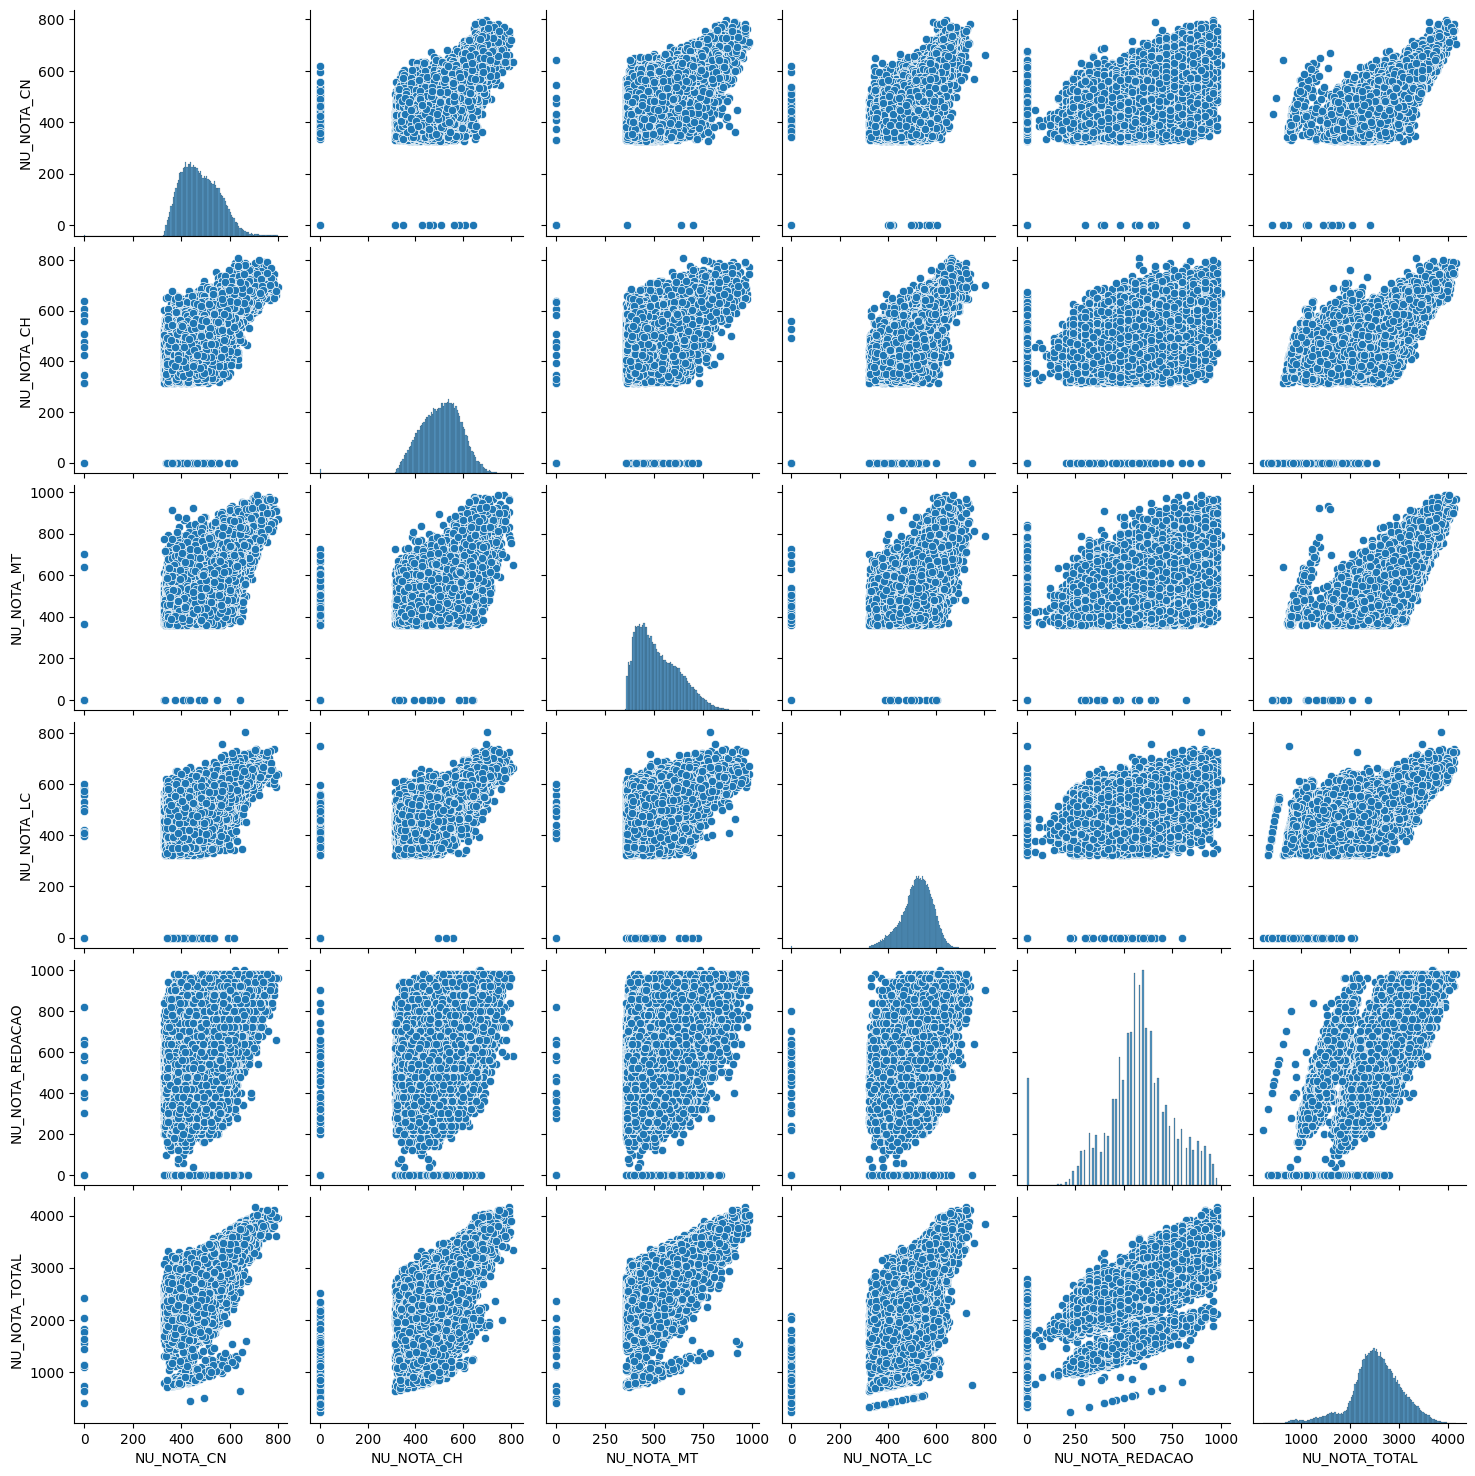

In [53]:
sns.pairplot(dados_sem_nota_zero[provas])

Análise estatística de correlação:

In [54]:
correlacao = dados_sem_nota_zero[provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO,NU_NOTA_TOTAL
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740,0.785600
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338,0.735534
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046,0.790051
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797,0.711686
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000,0.783647
NU_NOTA_TOTAL,0.785600,0.735534,0.790051,0.711686,0.783647,1.000000


Um mapa de calor para ajudar na visualização:

<Axes: >

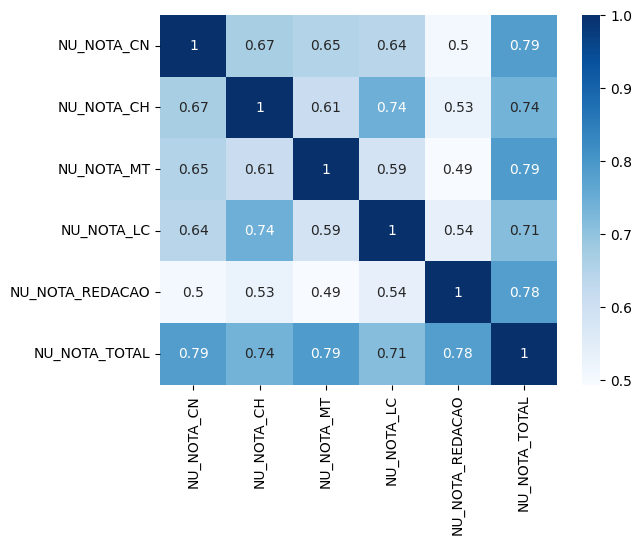

In [55]:
sns.heatmap(correlacao, cmap = 'Blues', annot=True)

**Desafio: plotar um "diagonal correlation matrix".**

### Usando Machine Learning e prevendo notas:  

Conseguimos prever a nota de matemática com base nas outras avaliações?

Para usar modelos de regressão linear, precisamos remover os dados com "NaN" e deixar somente os dados com notas.

In [56]:
provas

['NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_MT',
 'NU_NOTA_LC',
 'NU_NOTA_REDACAO',
 'NU_NOTA_TOTAL']

In [57]:
provas_entrada = ['NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_CN', 'NU_NOTA_REDACAO']
provas_saida = ['NU_NOTA_MT']

Uso da função .dropna() para remover os dados sem número: NaN. 

In [58]:
dados_sem_nota_zero = dados_sem_nota_zero[provas].dropna()

In [59]:
notas_entrada = dados_sem_nota_zero[provas_entrada]
notas_saida = dados_sem_nota_zero[provas_saida]

Criando um dataframe:

In [60]:
notas_entrada

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
0,512.3,488.6,435.6,420.0
2,499.1,441.0,423.2,560.0
3,578.1,551.5,426.2,500.0
4,571.3,511.2,516.5,780.0
5,618.7,607.5,559.6,900.0
...,...,...,...,...
127373,501.5,485.3,480.4,520.0
127375,559.6,525.7,502.4,740.0
127376,380.9,450.3,449.1,520.0
127378,416.2,517.3,564.7,620.0


In [61]:
notas_saida

,NU_NOTA_MT
0,432.4
2,427.2
3,499.9
4,424.5
5,615.6
...,...
127373,386.7
127375,539.7
127376,418.2
127378,455.7


Lembrando que f(x) = y, então temos:

In [62]:
x = notas_entrada
y = notas_saida

Temos que realizar uma divisão entre dados de treino e dados de teste, usaremos uma biblioteca chamada '**scikit learn**'. 

In [63]:
from sklearn.model_selection import train_test_split

SEED = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25,
                                                        random_state=SEED)

In [64]:
x_treino.head()

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
90200,567.7,523.2,542.7,660.0
12375,497.1,423.0,445.2,580.0
46320,494.0,528.5,454.0,520.0
111208,561.9,572.7,385.8,640.0
75943,686.5,646.5,625.7,900.0


In [65]:
x_teste.head()

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
114991,553.5,528.3,469.9,660.0
104685,551.9,569.5,581.9,700.0
91028,417.2,519.1,453.2,600.0
115802,555.9,534.3,540.0,560.0
93303,472.3,568.2,535.2,660.0


In [66]:
y_treino.head()

,NU_NOTA_MT
90200,518.3
12375,428.8
46320,621.8
111208,514.6
75943,786.2


In [67]:
y_teste.head()

,NU_NOTA_MT
114991,459.7
104685,617.2
91028,520.0
115802,703.8
93303,627.1


Se eu executar novamente as linhas de códigos, observamos que os valores mudam... Isso porque o nosso "*train_test_split*" possui um fator *random_state* e ele pega os dados de forma aleatória para fazer a divisão de treinos e testes.

Como eu quero garantir a reprodutibilidade dos resultados gerados, eu preciso voltar e gerar esse *random_state*.

Garantindo que todos os resultados estão gerando o mesmo número de linhas:

In [68]:
x_treino.shape

(69402, 4)

In [69]:
y_treino.shape

(69402, 1)

In [70]:
x_teste.shape

(23135, 4)

In [71]:
y_teste.shape

(23135, 1)

Agora vamos criar o nosso primeiro modelo...

### Modelo de Regressão Linear:

In [72]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR(random_state=4321)

O LinearSVR também tem o fator aleatoriedade, e queremos os mesmos resultados, então passamos o *random_state* como parâmetro. E usamos o *.fit* para o modelo se ajustar aos dados de treino. 

Agora vamos pegar as informações e características das notas que eu tenho e fazer uma predição dos valores.

In [73]:
predicoes_matematicas = modelo.predict(x_teste)

In [74]:
predicoes_matematicas

array([420.31950108, 478.71700082, 385.7069269 , ..., 471.7623776 ,
       540.54672299, 353.78044694])

Vamos comparar a predição com os 5 valores do teste:

In [75]:
y_teste[:5]

,NU_NOTA_MT
114991,459.7
104685,617.2
91028,520.0
115802,703.8
93303,627.1


Como avaliar se esse modelo está fazendo uma avaliação boa ou não?

Podemos plotar um gráfico das duas variáveis: *predicoes_matematicas* e *y_test*.

In [76]:
y_teste.values.shape

(23135, 1)

<Axes: >

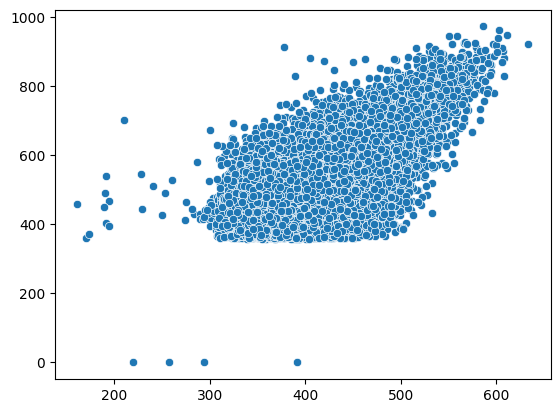

In [77]:
sns.scatterplot(x=predicoes_matematicas, y=y_teste.values.reshape(-1))

*y_teste* são as notas verdadeiras, e as *precicoes_matematicas* são as notas que o nosso modelo previu.

Se quisermos avaliar o quanto erramos para cada indivíduo, em cada nota, vamos usar a função *y_test **-** predicoes matematicas*. O quanto a pessoa tirou de nota real menos a predição.

No *eixo y* agora teremos o **erro do modelo**. E no eixo x é a nota original da pessoa (*y_teste*).


<Axes: >

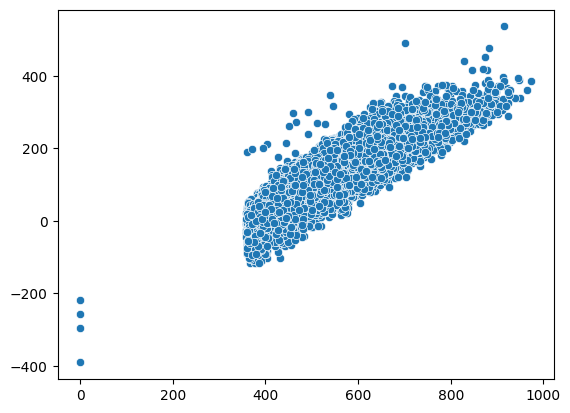

In [78]:
sns.scatterplot(x=y_teste.values.reshape(-1), y=(y_teste.values.reshape(-1)) - predicoes_matematicas)

Podemos observar que o nosso **modelo está com um erro de vício** em notas mais baixas, com **viés** em extremidade das notas: notas baixas para mais baixas e notas altas para mais altas. 

Obs: esse modelo está treinado para essas notas específicas pois está recebendo dados de entrada específicos. 


In [79]:
resultados = pd.DataFrame()
resultados['real'] = y_teste.values.reshape(-1)
resultados['previsão'] = predicoes_matematicas
resultados['diferenca'] = resultados['real'] - resultados['previsão']

In [80]:
resultados

,real,previsão,diferenca
0,459.7,420.319501,39.380499
1,617.2,478.717001,138.482999
2,520.0,385.706927,134.293073
3,703.8,459.039807,244.760193
4,627.1,441.995627,185.104373
...,...,...,...
23130,688.6,482.168386,206.431614
23131,479.1,489.849362,-10.749362
23132,501.4,471.762378,29.637622
23133,772.5,540.546723,231.953277


Além de fazer a diferença entre os valores reais e a previsão, também fazemos o "quadrado da diferença" para evitar resultados negativos. 

In [81]:
resultados = pd.DataFrame()
resultados['real'] = y_teste.values.reshape(-1)
resultados['previsão'] = predicoes_matematicas
resultados['diferenca'] = resultados['real'] - resultados['previsão']
resultados['quadrado_diferenca'] = (resultados['real'] - resultados['previsão'])**2

In [82]:
resultados

,real,previsão,diferenca,quadrado_diferenca
0,459.7,420.319501,39.380499,1550.823695
1,617.2,478.717001,138.482999,19177.541062
2,520.0,385.706927,134.293073,18034.629483
3,703.8,459.039807,244.760193,59907.551863
4,627.1,441.995627,185.104373,34263.628799
...,...,...,...,...
23130,688.6,482.168386,206.431614,42614.011438
23131,479.1,489.849362,-10.749362,115.548776
23132,501.4,471.762378,29.637622,878.388662
23133,772.5,540.546723,231.953277,53802.322714


Métrica que vai resumir a informação = média dos quadrados da diferença.

Tiro a média do modelo e isso me diz como o meu modelo performa.

In [83]:
resultados['quadrado_diferenca'].mean()

18324.11972400897

Tiro a raíz quadrada e isso me diz que o meu modelo me erra em x pontos, tanto para cima ou para baixo.

In [84]:
resultados['quadrado_diferenca'].mean()**(1/2)

135.36661229420264

### Validação de modelo:

DummyRegressor:

In [93]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

In [94]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_teste, dummy_predicoes)

12063.645588509502

In [95]:
mean_squared_error(y_teste, predicoes_matematica)

18324.11972400897

### Criando um modelo de árvore de decisão:


In [96]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state=SEED)
modelo.fit(x_treino, y_treino)
predicoes_matematicas = modelo.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematicas)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


18324.11972400897

In [98]:
from sklearn.tree import DecisionTreeRegressor

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25)
modelo_arvore = DecisionTreeRegressor(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
predicoes_matematicas_arvore = modelo_arvore.predict(x_teste)
mean_squared_error(y_teste, predicoes_matematicas_arvore)

6039.863802615628

Agora precisamos reduzir a aleatoriedade da nossa divisão de dados pra treino e teste.

Vamos pegar a nossa base de dados e dividi-la em pequenos grupos, e fazer rodadas de treino e teste com todos esses grupos.

Vamos implementar o método de **validação cruzada**:

É uma técnica para avaliar a capacidade de generalização de um modelo, a partir de um conjunto de dados. Esta técnica é amplamente empregada em problemas onde o objetivo da modelagem é a predição. Busca-se então estimar o quão preciso é este modelo na prática, ou seja, o seu desempenho para um novo conjunto de dados.

In [102]:
from sklearn.model_selection import cross_validate


modelo_arvore = DecisionTreeRegressor(max_depth = 2)
cross_validate(modelo_arvore, x, y)

{'fit_time': array([0.12082767, 0.08604479, 0.0779233 , 0.07467771, 0.09011316]),
 'score_time': array([0.0064342 , 0.00582767, 0.00993013, 0.00586748, 0.00579405]),
 'test_score': array([0.4407387 , 0.46932939, 0.44677494, 0.48503567, 0.40186925])}

In [103]:
resultados = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()

resultados

{'fit_time': array([0.09239173, 0.08660269, 0.09172535, 0.09408665, 0.09214497,
        0.1259656 , 0.0921433 , 0.09278655, 0.12000823, 0.08747268]),
 'score_time': array([0.0053966 , 0.00517058, 0.00652313, 0.00538254, 0.00514007,
        0.00665116, 0.00484419, 0.03505397, 0.00488782, 0.00327444]),
 'test_score': array([-6118.6911947 , -6536.09830186, -6338.64260896, -6456.70685686,
        -6234.97203593, -6794.25120283, -6713.45694262, -6693.04880297,
        -6610.58461646, -7085.82408339])}

In [104]:
modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()
desvio_padrao = (resultados["test_score"]*-1).std()
lim_inferior = media - (2*desvio_padrao)
lim_superior = media + (2*desvio_padrao)

print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

Intervalo de confiança 6015.722549536809 - 7100.732779780728


In [105]:
resultados["test_score"]*-1

array([6118.6911947 , 6536.09830186, 6338.64260896, 6456.70685686,
       6234.97203593, 6794.25120283, 6713.45694262, 6693.04880297,
       6610.58461646, 7085.82408339])

In [106]:
def calcula_mse(resultados):
    media = (resultados["test_score"]*-1).mean()
    desvio_padrao = (resultados["test_score"]*-1).std()
    lim_inferior = media - (2*desvio_padrao)
    lim_superior = media + (2*desvio_padrao)
    print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

In [107]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import numpy as np

SEED= 1232
np.random.seed(SEED)



partes = KFold(n_splits = 10, shuffle=True)
modelo_arvore = DecisionTreeRegressor(max_depth=3)
resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error")
calcula_mse(resultados)

Intervalo de confiança 5858.741842392759 - 6250.793292491384


Em estatística, intervalo de confiança (IC) é um tipo de estimativa por intervalo de um parâmetro populacional desconhecido. É um intervalo observado (calculado a partir de observações) que pode variar de amostra para amostra e que com dada frequência (nível de confiança) inclui o parâmetro de interesse real não observável.

In [108]:
def regressor_arvore(nivel):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Treino = {(resultados['train_score']*-1).mean()}|Teste = {(resultados['test_score']*-1).mean()}")

regressor_arvore(4)

Treino = 5760.834451245899|Teste = 5815.707286597402


In [109]:
for i in range(1,21):
    regressor_arvore(i)

Treino = 7844.952652412207|Teste = 7857.871770206351
Treino = 6527.783475408351|Teste = 6556.886287657656
Treino = 6021.275229419075|Teste = 6054.767567442072
Treino = 5760.834451245899|Teste = 5815.707286597402
Treino = 5598.158955426787|Teste = 5675.196789060744
Treino = 5469.677369145869|Teste = 5593.304363812442
Treino = 5369.458309852721|Teste = 5541.646599457925
Treino = 5276.16965707928|Teste = 5542.053091078966
Treino = 5166.713159932668|Teste = 5608.390265709719
Treino = 5022.598049115693|Teste = 5761.4934268457555
Treino = 4833.560706021637|Teste = 5955.958714168911
Treino = 4598.125022484774|Teste = 6216.553608637031
Treino = 4316.3791662866815|Teste = 6514.07032957674
Treino = 4000.6209880837496|Teste = 6848.344737600635
Treino = 3655.8197526274853|Teste = 7235.435245488157
Treino = 3295.832684540846|Teste = 7633.948584409428
Treino = 2931.7212612043872|Teste = 8059.378759944782
Treino = 2575.59534021339|Teste = 8435.937377688437
Treino = 2233.5742434614776|Teste = 8819.086

A classe social do candidato inscrito influencia tanto sua presença no exame, quanto sua nota, o que aumenta o gap social, uma vez que os alunos de renda mais alta tem mais chances de cursar o ensino superior, usando seu desempenho no ENEM.

Análises feitas por [Jessica Silva](https://www.linkedin.com/in/ssilvajessica/), em maio de 2023.